# Mini Project 3 : Image Compression

How many times have we faced this issue? We love clicking images with our smartphone cameras and saving random photos off the web. And then one day – no space! Image compression helps deal with that headache.

In this mini-project, we investigage how linear algebra can be used to achieve efficient storage strategies, in particular in the context of image compression.

We aim here at using SVD, to minimize the size of an image in bytes to an acceptable level of quality. 
This means that you are able to store more images in the same disk space as compared to before.

Image compression takes advantage of the fact that only a few of the singular values obtained after SVD are large. You can trim the three matrices based on the first few singular values and obtain a compressed approximation of the original image. Some of the compressed images are nearly indistinguishable from the original by the human eye.





### Conversion from RGB to greyscale
    
    
 Although compression of colour images is similar to the compression of a greyscale image, we will use in this notebook
 black and white pictures only. To facilitate the import of colour pictures to your notebook, we provide hereafter a function  that converts pictures in Red/Green/Blue format to greyscale.   
      
    

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


### Importing pictures to your Notebook

We will use here the "image" module, available in matplotlib : ``import matplotlib.image as mpimg ``


To import a picture, use the ``imread`` command:

img=mpimg.imread('filename.png') 

and make sure that the file is located in the same directory as you Jupyter Notebook.

This command stores in the variable ``img`` a colour map (picture). To convert to
a black and white image, use the function ``rgb2gray`` defined above:

`` bw = rgb2gray(img) ``  

Where ``bw`` is now a matrix, whose matrix elements represents a pixel with an intensity (0=black, 1=white).

To display within your Notebook the matrix, use the ``imshow`` command:

``plt.imshow(bw, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)``

The matrix ``bw`` can be manipulated with linear algebra operation as any other matrix. 


       
    
    
    

### Question 1 : SVD decomposition
 Load and display the figures "tiger.png" and "beach.png". After they are displayed in your Python Notebook,
    show the dimensions of the two matrices with the command :  ``numpy.matrix.shape(A)`` . For each matrix, apply the SVD decomposition, and plot in a graph the eigenvalues as function of their index (1,..,N). 
  










In [6]:
import numpy as np

a = np.zeros((2,5))
print(a)
print(np.shape(a))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(2, 5)


shape is 1000 x 1600


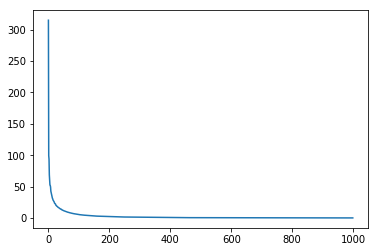

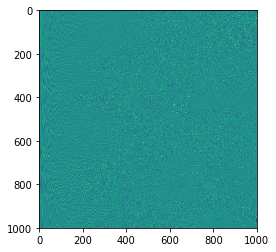

shape is 638 x 960


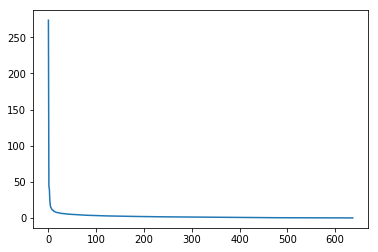

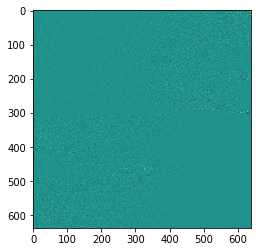

In [8]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

names = ["tiger.png", "beach.png"]

imgs = [rgb2gray(mpimg.imread(name)) for name in names]

def showEig(img):
    m,n = np.shape(img)
    print("shape is {0} x {1}".format(m,n))
    
    U, eigs, V = np.linalg.svd(img)
    
    [plt.plot(range(len(eigs)), eigs)]
    plt.show()
    
    plt.imshow(U)
    plt.show()

def getEigs(img):
    m,n = np.shape(img)
    U, eigs, V = np.linalg.svd(img)
    
    return eigs
    
showEig(imgs[0])
showEig(imgs[1])














### Question 2 : Image compression, the "beach" picture
    
   
  Apply different cutoff in the SVD decomposition, by only keeping the largest eigenvalues in the SVD decomposition. Typically, if the decomposition reads:
  
  $$ A = U \Sigma V^T $$, 
  
  Where $A$ is the original matrix, we keep the L largest eigenvalues of $\Sigma$, and consider that the remaining ones are naught. 
  
  We suggest in the following steps to consider the following number of remaining components:

620, 500, 400, 300, 200, 100 .

For each component, recalculate the picture matrix, and display your result. 

    

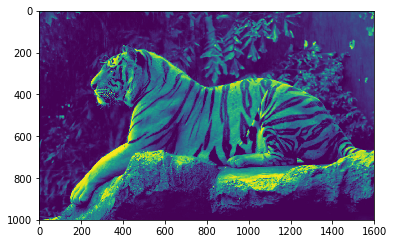

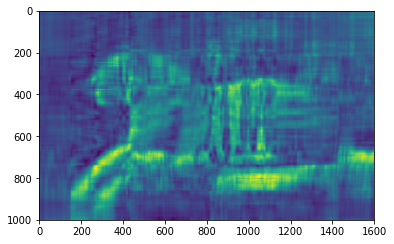

In [9]:
def compress(img, components = 500):
    U, S, T = np.linalg.svd(img)
    
    compressed_S = np.zeros((img.shape[0],img.shape[1]))
    
    for i in range(components):
        compressed_S[i][i] = S[i]
    
    return np.dot(U, np.dot(compressed_S, T))

plt.imshow(imgs[0])
plt.show()
plt.imshow(compress(imgs[0], 10))
plt.show()

def cutout(img, start = 0, end = 500):
    U, S, T = np.linalg.svd(img)
    
    compressed_S = np.zeros((img.shape[0],img.shape[1]))
    
    for i in [i for i in range(start)] + [i for i in range(end, len(S))]:
        compressed_S[i][i] = S[i]
    
    return np.dot(U, np.dot(compressed_S, T))

### Question 3 : Image compression, the "tiger" picture


Extend what you have done in "Question 2" to the "tiger" picture.







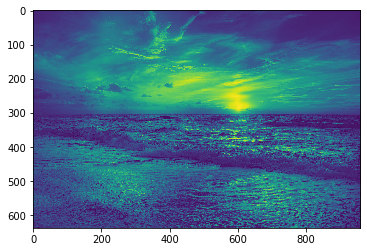

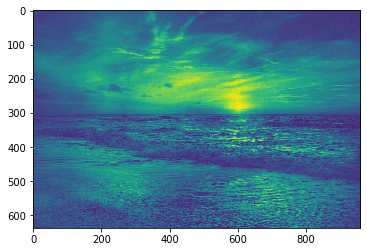

In [31]:
plt.imshow(imgs[1])
plt.show()
plt.imshow(compress(imgs[1], 100))
plt.show()













## Question 4 : The mystery guest


We have today a mystery guest, identify who is hidden in the picture below. We have typically added noise
to a picture. For this, load the file "guest.png", following the same steps as in Question 2 and Question 3. 
However, this time the picture has been "damaged", and you'll have to use SVD to filter the noise. 

Use your own choice of cutoff on the $\Sigma$ matrix. Compare different number of components and try to identify our
"special guest". Choose the optimal number of components, such that the noise is reduced, but such that you can 
remain part of the information. 

Plot the SVD eigenvalues for the noisy picture. Discuss how you could identify the optimal number of components from this
graph, such that you retain information, but discard the noise. 





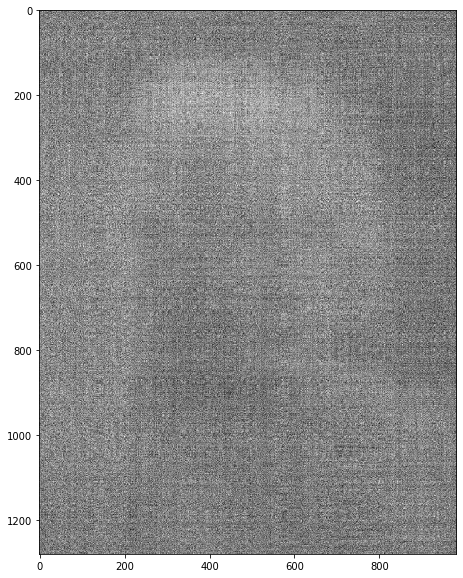

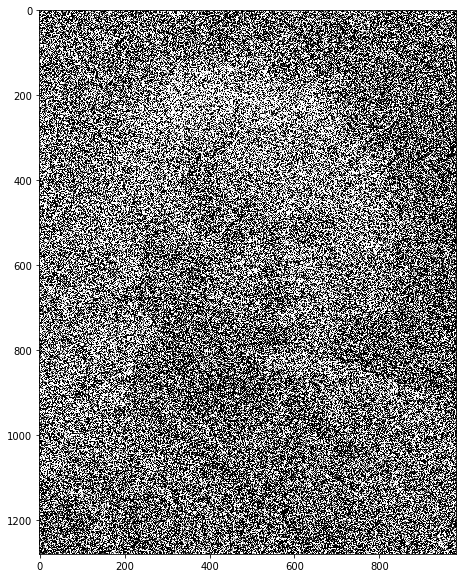

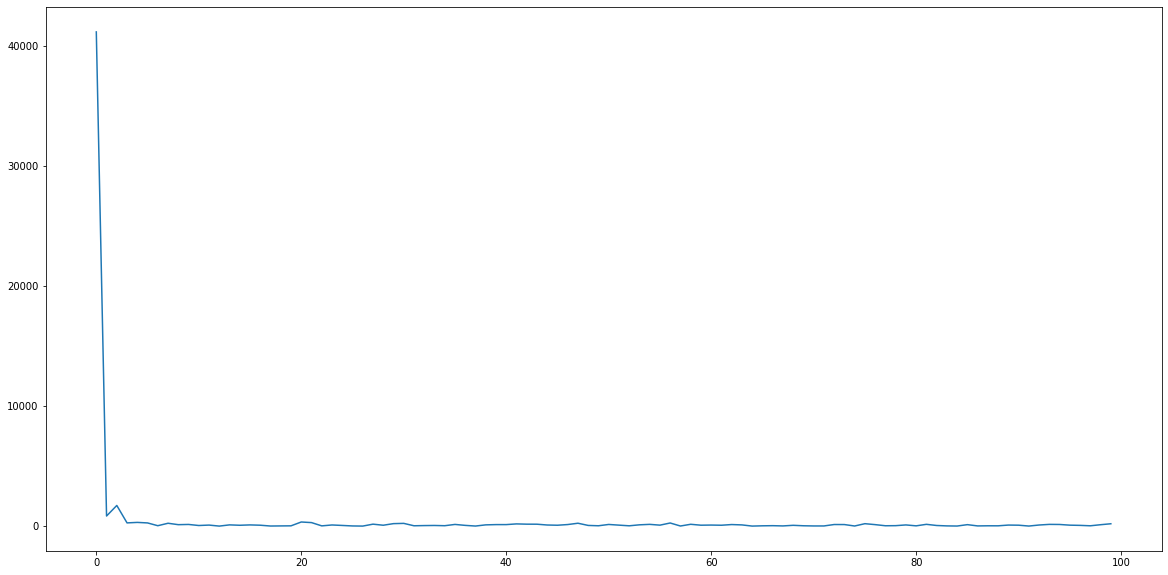

In [115]:
guest = rgb2gray(mpimg.imread("guest.png"))

#showEig(guest)
plt.rcParams["figure.figsize"] = (20,10)

#eigs = getEigs(guest)
#plt.plot(range(len(eigs[2:])), eigs[2:])
#plt.show()

# plt.imshow(compress(cutout(guest, 2,5), 600),cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
# plt.show()

plt.imshow(compress(guest, 30),cmap=plt.get_cmap('gray'))
plt.show()

plt.imshow(guest,cmap=plt.get_cmap('gray'))
plt.show()


def totalLap(img):
    total = 0
    for i in range(1, len(img) - 1):
        total += np.abs(np.sum(img[i] - img[i-1])) + np.abs(np.sum(img[i] - img[i+1]))
    
    return total


def getVar(img, num):
    U, S, T = np.linalg.svd(img)
    var = []
    
    for i in range(0,num):
        compressed_S = np.zeros((img.shape[0],img.shape[1]))
    
        compressed_S[i][i] = S[i]
    
        current = np.dot(U, np.dot(compressed_S, T))
        var.append(totalLap(current))
    return var

def getSlice()

# plt.plot(range(0,100), getVar(guest,100))
# plt.show()

















## Question 5 : The code


In this exercice, we try to decypher a written message. Load the image called "code.png",
and repeat the same step as in Question 4. Here, try to identify the hidden code in the picture.








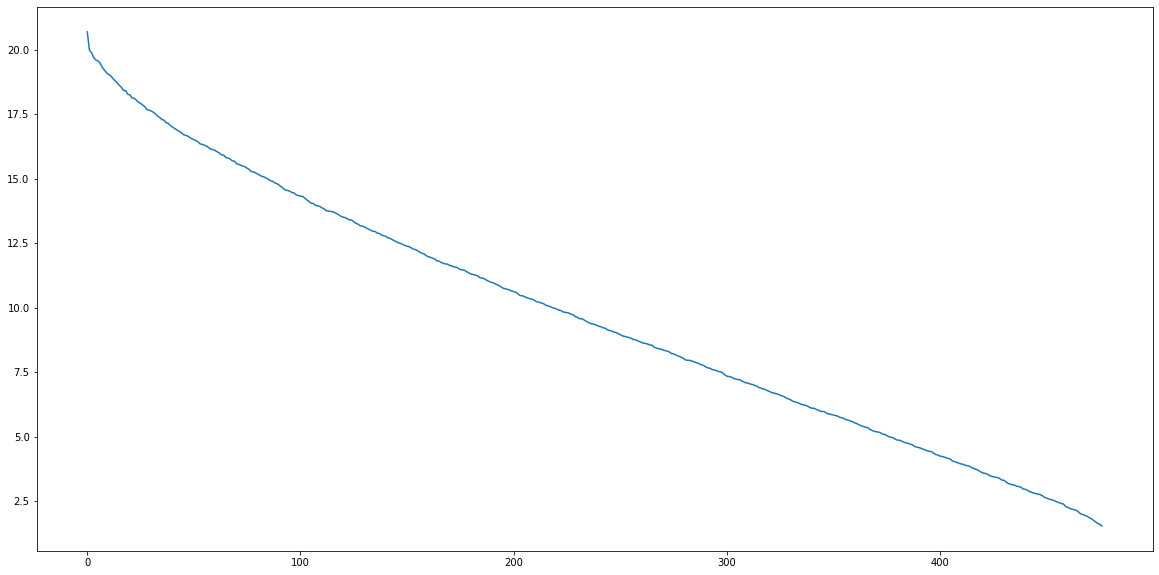

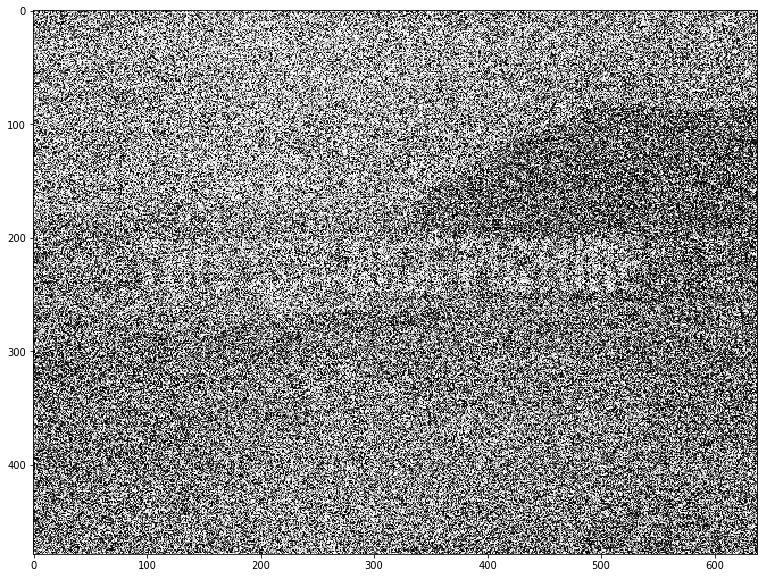

In [114]:
guest = rgb2gray(mpimg.imread("code.png"))

#showEig(guest)
plt.rcParams["figure.figsize"] = (20,10)

eigs = getEigs(guest)
plt.plot(range(len(eigs[2:])), eigs[2:])
plt.show()

plt.imshow(compress(cutout(guest, 5,30), 400),cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

# plt.imshow(compress(guest, 30),cmap=plt.get_cmap('gray'))
plt.show()


















## Open question: 

- Imagine that you are given a security video footage, where you see people coming in and out of the video frame. You would like to remove the still background, such that people moving in the frame can be more easily identified. Suggest how you could extend the SVD decomposition to achieve such a task (do not implement it, but discuss in general terms what would be your approach).
    

    
    
    
    
    


Answer: ......







